In [1]:
import h5py
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from spiceracs.utils import fit_pl
from astropy.stats import akaike_info_criterion_lsq
%matplotlib inline
import matplotlib as mpl    
mpl.rc("figure", dpi=300)

In [2]:
tab = Table.read("/group/ja3/athomson/spice-racs.dr1.corrected.xml")

In [3]:
spectra = h5py.File("/group/ja3/athomson/full_spica/casda/spice_racs_dr1_polspec.hdf5")[
    "polspectra"
]

In [4]:
# spectra[row["cat_id"]]["stokesI"]

In [5]:
# def flat_power_law(nu: np.ndarray, norm: float, ref_nu: float) -> np.ndarray:
#     """A power law model.

#     Args:
#         nu (np.ndarray): Frequency array.
#         norm (float): Reference flux.
#         alpha (float): Spectral index.
#         ref_nu (float): Reference frequency.

#     Returns:
#         np.ndarray: Model flux.
#     """
#     x = (nu/ref_nu)
#     return norm * x

# def curved_power_law(nu: np.ndarray, norm: float, alpha: float, beta: float, ref_nu: float) -> np.ndarray:
#     """A power law model.

#     Args:
#         nu (np.ndarray): Frequency array.
#         norm (float): Reference flux.
#         alpha (float): Spectral index.
#         ref_nu (float): Reference frequency.

#     Returns:
#         np.ndarray: Model flux.
#     """
#     x = (nu/ref_nu)
#     power = alpha + beta * np.log10(x)
#     return norm * x ** power

In [6]:
# from scipy.optimize import curve_fit
# from functools import partial
# def fit_pl(freq: np.ndarray, flux: np.ndarray, fluxerr: np.ndarray, nterms:int) -> dict:
#     """Perform a power law fit to a spectrum.

#     Args:
#         freq (np.ndarray): Frequency array.
#         flux (np.ndarray): Flux array.
#         fluxerr (np.ndarray): Error array.

#     Returns:
#         dict: Best fit parameters.
#     """
#     try:
#         goodchan=np.logical_and(np.isfinite(flux),np.isfinite(fluxerr)) #Ignore NaN channels!
#         ref_nu = np.nanmean(freq[goodchan])
#         p0_long = (np.median(flux[goodchan]), -0.8, 0.0)
#         model_func_dict = {
#             0: partial(flat_power_law, ref_nu=ref_nu),
#             1: partial(power_law, ref_nu=ref_nu),
#             2: partial(curved_power_law, ref_nu=ref_nu),
#         }
#         aics = []
#         params = []
#         errors = []
#         models = []
#         for n in range(nterms+1):
#             p0 = p0_long[:n+1]
#             model_func = model_func_dict[n]
#             try:
#                 fit_res = curve_fit(
#                     model_func,
#                     freq[goodchan],
#                     flux[goodchan],
#                     p0=p0,
#                     sigma=fluxerr[goodchan],
#                     absolute_sigma=True
#                 )
#             except RuntimeError:
#                 aics.append(np.nan)
#                 params.append(np.nan)
#                 errors.append(np.nan)
#                 models.append(np.nan)
#                 print(f"{n}: {np.nan}")
#                 continue
#             best_p, covar = fit_res
#             model_arr = model_func(freq, *best_p)
#             ssr = np.sum((flux[goodchan] - model_arr[goodchan])**2)
#             aic = akaike_info_criterion_lsq(ssr, len(p0), goodchan.sum())
#             aics.append(aic)
#             params.append(best_p)
#             errors.append(np.sqrt(np.diag(covar)))
#             models.append(model_arr)
#             print(f"{n}: {aic}")
#         best_n = np.nanargmin(aics)
#         print(f"Best fit: {best_n}, {aics[best_n]}")
#         print(f"Best fit model: {best_n}")
#         best_p = params[best_n]
#         best_e = errors[best_n]
#         best_m = models[best_n]
#         best_f = model_func_dict[best_n]
#         return dict(
#             best_n=best_n,
#             best_p=best_p,
#             best_e=best_e,
#             best_m=best_m,
#             best_f=best_f,
#         )
#     except Exception as e:
#         print(f"Failed to fit power law: {e}")
#         return dict(
#             best_n=np.nan,
#             best_p=np.nan,
#             best_e=np.nan,
#             best_m=np.ones_like(freq),
#             best_f=None,
#         )
#     #     return dict(
#     #         norm=np.nan,
#     #         alpha=np.nan,
#     #         beta=np.nan,
#     #         norm_err=np.nan,
#     #         alpha_err=np.nan,
#     #         beta_err=np.nan,
#     #         chi2=np.nan,
#     #         rchi2=np.nan,
#     #         dof=np.nan,
#     #         ref_nu=np.nan,
#     #         model_arr=np.ones_like(freq),
#     #     )

    
#     # err_p = np.sqrt(np.diag(covar))
#     # dof = len(freq[goodchan]) - 2
    
#     # chi2 = np.sum(
#     #     ((flux - model_arr) / fluxerr)**2
#     #     )
#     # 
    
#     # rchi2 = chi2 / dof

#     # return dict(
#     #     norm=best_p[0],
#     #     alpha=best_p[1],
#     #     beta=best_p[2],
#     #     norm_err=err_p[0],
#     #     alpha_err = err_p[1],
#     #     beta_err = err_p[2],
#     #     chi2=chi2,
#     #     rchi2=rchi2,
#     #     dof=dof,
#     #     ref_nu=ref_nu,
#     #     model_arr=model_arr,
#     # )

In [7]:
import logging as log
# Set to debug level
log.getLogger().setLevel(log.DEBUG)

DEBUG:root:0: -1842.8786805721968
DEBUG:root:1: -2812.5851030237754
DEBUG:root:2: -2887.651027703023
DEBUG:root:Lowest AIC is -2887.651027703023, with 2 params.
DEBUG:root:Best fit: 2, -2887.651027703023


False


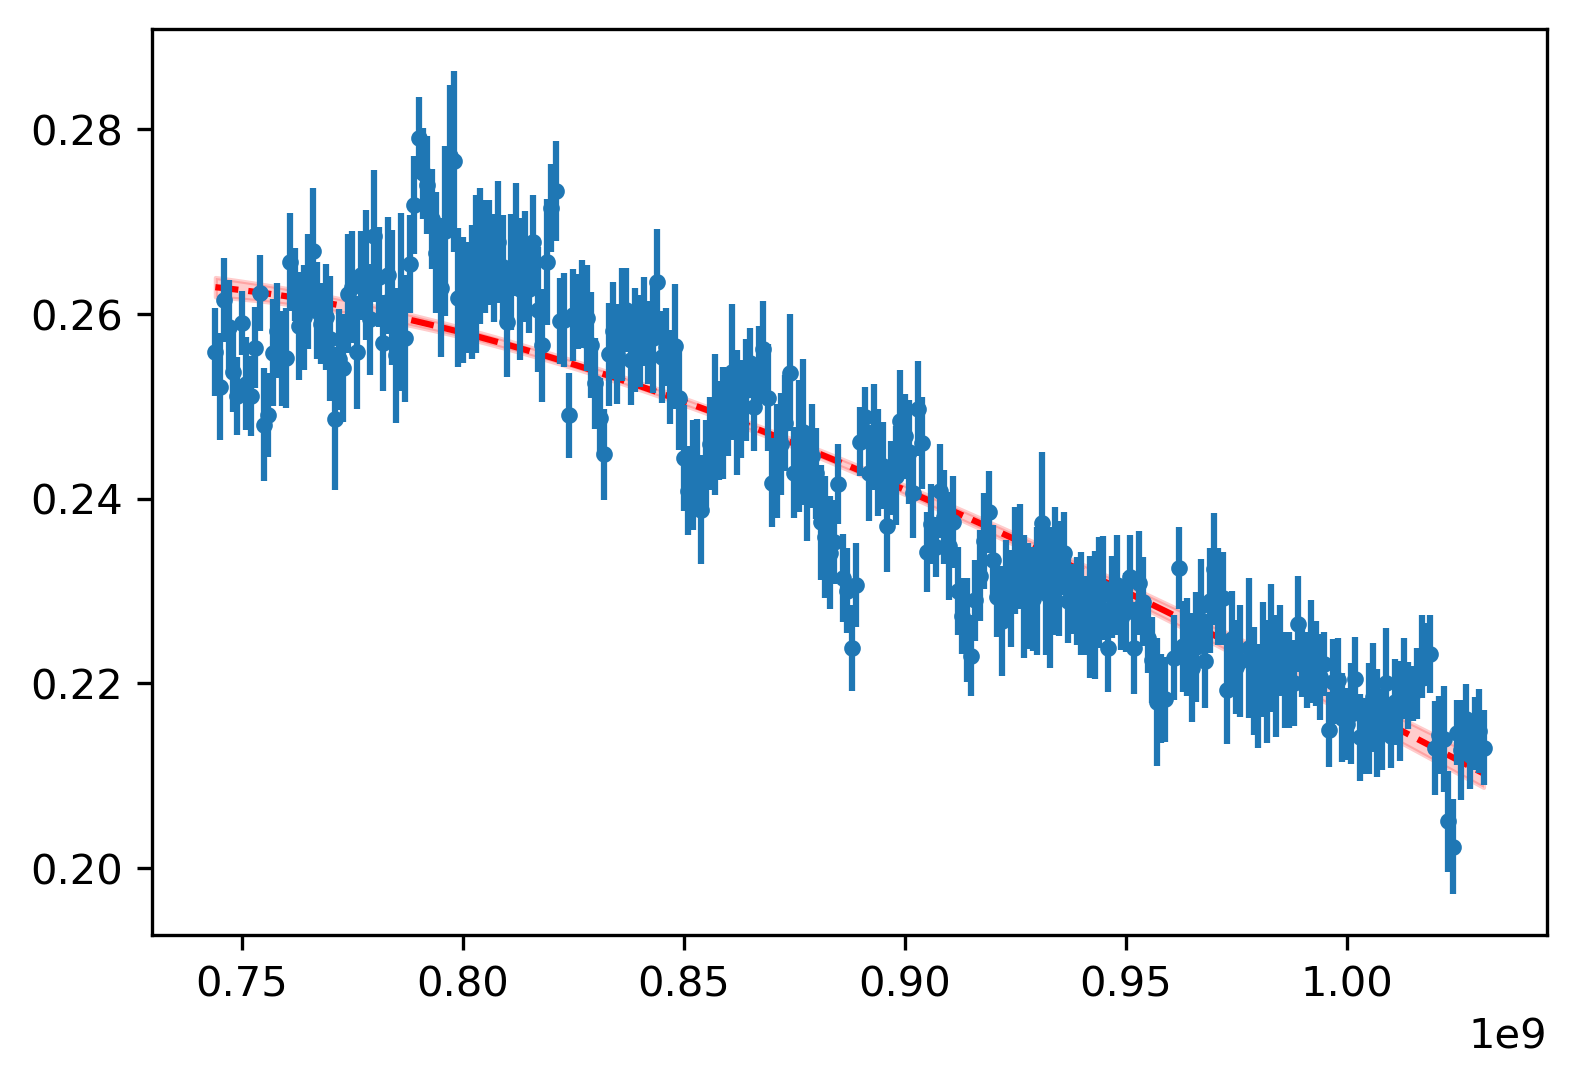

In [16]:
# idx = np.argmax(tab["stokesI"a])
idx = np.where(tab["stokesI"]==np.percentile(tab["stokesI"], 99, method="nearest"))[0][0]
row = tab[idx]
fit_dict = fit_pl(
    spectra[row["cat_id"]]["freq"][:],
    spectra[row["cat_id"]]["stokesI"][:],
    spectra[row["cat_id"]]["stokesI_error"][:],
    nterms=2
)
# fit_dict

# pl_res = fit_dict
# # pl_reject =  pl_res['chi2'] > chi2.ppf(0.99, pl_res['dof'])
# pl_params = [pl_res[i] for i in ['norm', 'alpha','beta']]
nu = spectra[row["cat_id"]]["freq"][:]

plt.plot(
    nu,
    # fit_dict["best_f"](nu, *fit_dict["best_p"]),
    fit_dict["best_m"],
    ls='--',
    color='red',
    # label=f"Power-law, r$\chi^2$  {pl_res['rchi2']:.3f}, reject {pl_reject}"
)
plt.errorbar(
    spectra[row["cat_id"]]["freq"][:],
    spectra[row["cat_id"]]["stokesI"][:],
    yerr=spectra[row["cat_id"]]["stokesI_error"][:],
    fmt=".",
)
plt.fill_between(
    nu,
    fit_dict["best_l"],
    fit_dict["best_h"],
    color='red',
    alpha=0.2,
)
# plt.ylim(0, 1.1*np.nanmax(spectra[row["cat_id"]]["stokesI"][:]))
# # plt.xscale("log")
# # plt.yscale("log")
# print(f"{fit_dict['best_p']}")
# print(f"{fit_dict['best_e']}")
# print(f"{fit_dict['alpha']:0.2f} ± {fit_dict['alpha_err']:0.2f}")
# print(f"{fit_dict['beta']:0.2f} ± {fit_dict['beta_err']:0.2f}")
','.join(
                [
                    # Pad with zeros to length 5
                    str(i) for i in np.pad(
                        fit_dict["best_p"],
                        (0, 5-len(fit_dict["best_p"])),
                        'constant'
                    )[::-1]
                ]
            )
print(fit_dict["fit_flag"])

<ErrorbarContainer object of 3 artists>

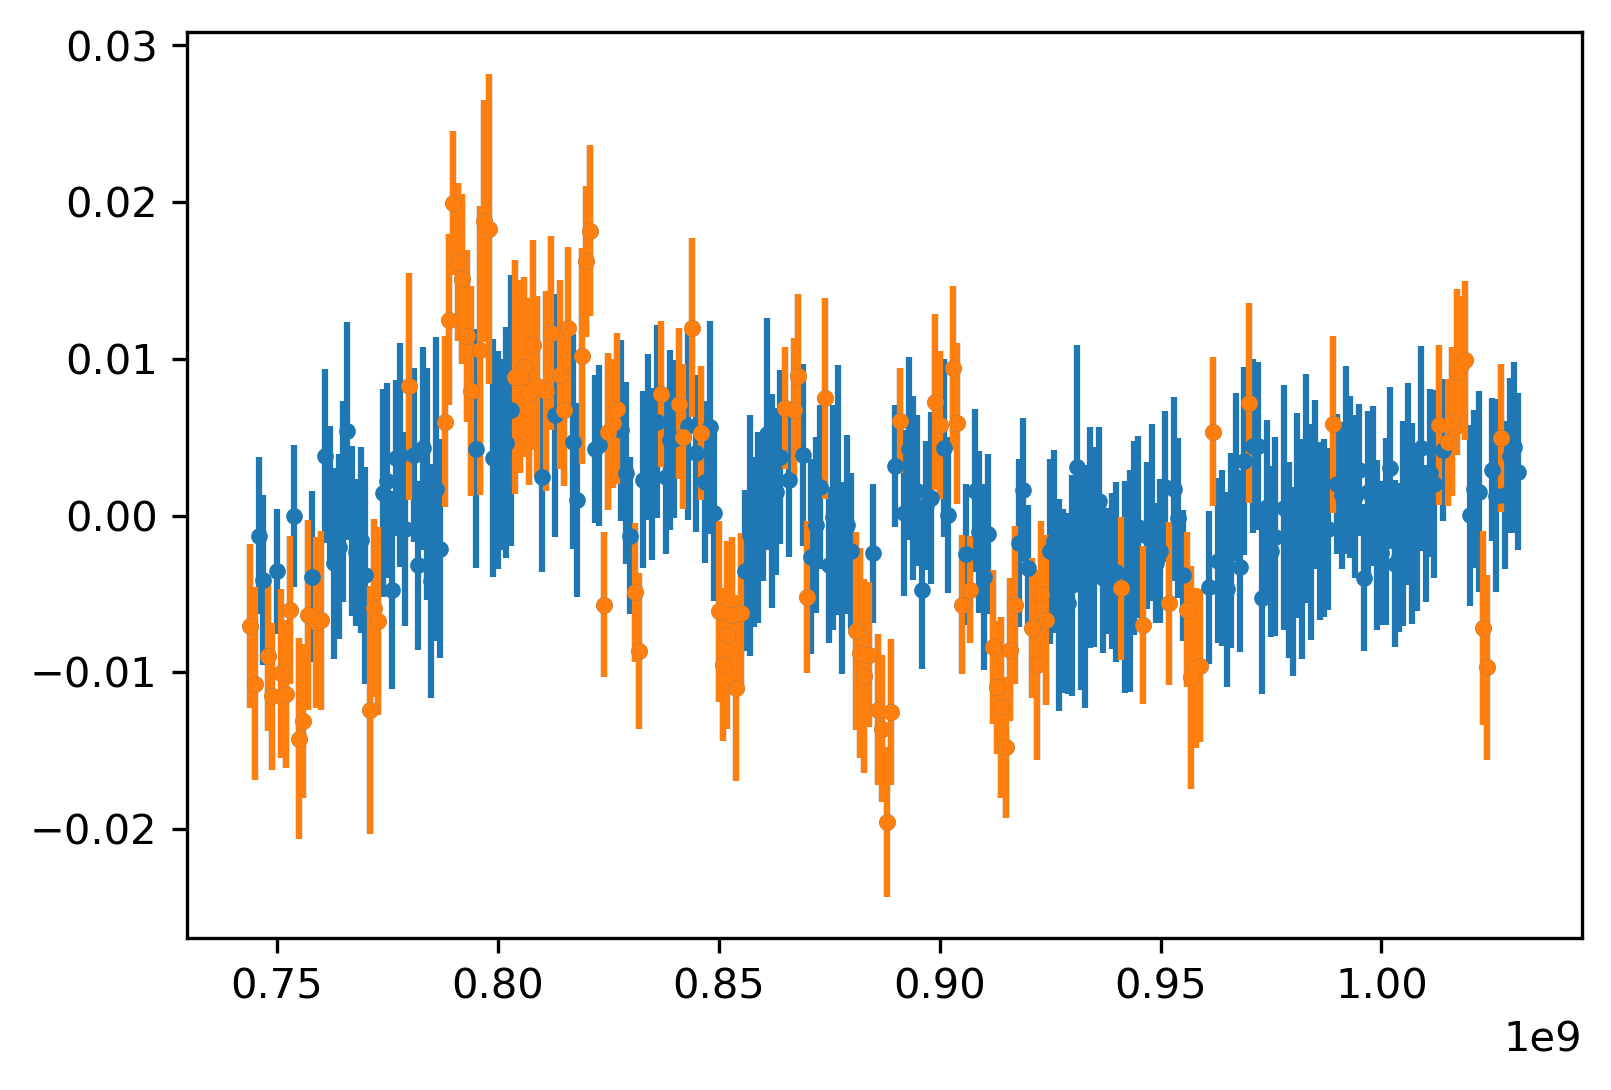

In [17]:
freq = spectra[row["cat_id"]]["freq"][:]
flux = spectra[row["cat_id"]]["stokesI"][:]
fluxerr = spectra[row["cat_id"]]["stokesI_error"][:]
goodchan=np.logical_and(np.isfinite(flux),np.isfinite(fluxerr)) #Ignore NaN channels!
ref_nu = np.nanmean(freq[goodchan])
model_arr = fit_dict["best_m"]
model_high = fit_dict["best_h"]
model_low = fit_dict["best_l"]
model_err = model_high - model_low
residuals = flux[goodchan] - model_arr[goodchan]
residuals_err = np.hypot(fluxerr[goodchan], model_err[goodchan])
sigma = 1
plt.errorbar(
    freq[goodchan],
    residuals,
    yerr=sigma*residuals_err,
    fmt=".",
)
is_outside_1sigma = (np.abs(residuals) > sigma*residuals_err)
plt.errorbar(
    freq[goodchan][is_outside_1sigma],
    residuals[is_outside_1sigma],
    yerr=sigma*residuals_err[is_outside_1sigma],
    fmt=".",
)
is_low_snr = (model_arr[goodchan] < fluxerr[goodchan])
plt.errorbar(
    freq[goodchan][is_low_snr],
    residuals[is_low_snr],
    yerr=sigma*residuals_err[is_low_snr],
    fmt=".",
)
# plt.plot(
#     np.abs(residuals),
#     residuals_err,
#     '.'
# )
# # plt 1:1 line
# plt.plot(
#     np.abs(residuals),
#     np.abs(residuals),
#     '--'
# )

In [10]:
is_low_snr

array([False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [11]:

# Pad with zeros to length 5
np.pad(fit_dict["best_p"], (0, 5-len(fit_dict["best_p"])), 'constant')[::-1]

array([ 0.        ,  0.        ,  0.        , -0.72640063,  0.01047174])

In [12]:
','.join(
                [
                    # Pad with zeros to length 5
                    str(i) for i in np.pad(
                        fit_dict["best_p"],
                        (0, 5-len(fit_dict["best_p"])),
                        'constant'
                    )[::-1]
                ]
            )

'0.0,0.0,0.0,-0.726400626933319,0.010471739201501629'

In [13]:
np.pad(fit_dict["best_e"], (0, 5-len(fit_dict["best_e"])), 'constant')[::-1]

array([0.        , 0.        , 0.        , 0.33971029, 0.00034831])

In [14]:
fit_dict["alpha"]

KeyError: 'alpha'

In [ ]:
fit_dict["alpha_err"]

In [ ]:
# from scipy.optimize import curve_fit
# from functools import partial

# # Stolen from GLEAM-X - thanks Uncle Timmy!
# def power_law(nu: np.ndarray, norm: float, alpha: float, ripple: float, ref_nu: float) -> np.ndarray:
#     """A power law model.

#     Args:
#         nu (np.ndarray): Frequency array.
#         norm (float): Reference flux.
#         alpha (float): Spectral index.
#         ref_nu (float): Reference frequency.

#     Returns:
#         np.ndarray: Model flux.
#     """
#     return norm * (nu / ref_nu) ** alpha * np.sin(2 * np.pi * (nu / ripple))

# def fit_pl(freq: np.ndarray, flux: np.ndarray, fluxerr: np.ndarray) -> dict:
#     """Perform a power law fit to a spectrum.

#     Args:
#         freq (np.ndarray): Frequency array.
#         flux (np.ndarray): Flux array.
#         fluxerr (np.ndarray): Error array.

#     Returns:
#         dict: Best fit parameters.
#     """
#     goodchan=np.logical_and(np.isfinite(flux),np.isfinite(fluxerr)) #Ignore NaN channels!
#     ref_nu = np.nanmean(freq[goodchan])
#     p0 = (np.median(flux[goodchan]), -0.8, 25*1e6)
#     try:
#         fit_res = curve_fit(
#             partial(power_law, ref_nu=ref_nu),
#             freq[goodchan],
#             flux[goodchan],
#             p0=p0,
#             sigma=fluxerr[goodchan],
#             absolute_sigma=True
#         )
#     except RuntimeError:
#         return dict(
#             norm=np.nan,
#             alpha=np.nan,
#             norm_err=np.nan,
#             alpha_err=np.nan,
#             chi2=np.nan,
#             rchi2=np.nan,
#             dof=np.nan,
#             ref_nu=np.nan,
#             model_arr=np.nan,
#             ripple=np.nan,
#         )

#     best_p, covar = fit_res
#     err_p = np.sqrt(np.diag(covar))
#     dof = len(freq) - 2
#     model_arr = power_law(freq, *best_p, ref_nu=ref_nu)
#     chi2 = np.sum(
#         ((flux - model_arr) / fluxerr)**2
#         )
#     rchi2 = chi2 / dof

#     return dict(
#         norm=best_p[0],
#         alpha=best_p[1],
#         norm_err=err_p[0],
#         alpha_err = err_p[1],
#         ripple = best_p[2],
#         ripple_err = err_p[2],
#         chi2=chi2,
#         rchi2=rchi2,
#         dof=dof,
#         ref_nu=ref_nu,
#         model_arr=model_arr,
#         # ripple=ripple,
#     )

# # def power_law(nu, norm, alpha, ref_nu):
# #     return norm * (nu / ref_nu) ** alpha


# # def curved_power_law(nu, norm, alpha, q, ref_nu):
# #     spec_nu = nu / ref_nu
        
# #     return norm * spec_nu ** alpha * \
# #             np.exp(q * np.log(spec_nu)**2)

# # def fit_pl(freq, flux, fluxerr):

# #     goodchan=np.logical_and(np.isfinite(flux),np.isfinite(fluxerr)) #Ignore NaN channels!
# #     ref_nu = np.nanmean(freq[goodchan])
# #     p0 = (np.median(flux[goodchan]), -0.8)
# #     try:
# #         fit_res = curve_fit(
# #             partial(power_law, ref_nu=ref_nu),
# #             freq[goodchan],
# #             flux[goodchan],
# #             p0=p0,
# #             sigma=fluxerr[goodchan],
# #             absolute_sigma=True
# #         )
# #     except RuntimeError:
# #         return None

# #     best_p, covar = fit_res
# #     err_p = np.sqrt(np.diag(covar))
# #     dof = len(freq) - 2
# #     model_arr = power_law(freq, *best_p, ref_nu=ref_nu)
# #     chi2 = np.sum(
# #         ((flux - model_arr) / fluxerr)**2
# #         )
# #     rchi2 = chi2 / dof

# #     return dict(
# #         norm=best_p[0], 
# #         alpha=best_p[1],
# #         norm_err=err_p[0],
# #         alpha_err = err_p[1],
# #         chi2=chi2,
# #         rchi2=rchi2,
# #         dof=dof,
# #         ref_nu=ref_nu,
# #         model_arr=model_arr,
# #     )


# # def fit_cpl(freq, flux, fluxerr):
# #     p0 = (np.median(flux), -0.8, 0)

# #     try:
# #         fit_res = curve_fit(
# #             curved_power_law,
# #             freq,
# #             flux,
# #             p0=p0,
# #             sigma=fluxerr,
# #             absolute_sigma=True
# #         )
# #     except RuntimeError:
# #         return None

# #     best_p, covar = fit_res
# #     err_p = np.sqrt(np.diag(covar))
# #     dof = len(freq) - 3
# #     chi2 = np.sum(
# #         ((flux - curved_power_law(freq, *best_p)) / fluxerr)**2
# #         )
# #     rchi2 = chi2 / dof
# #     return dict(
# #         norm=best_p[0], 
# #         alpha=best_p[1],
# #         q=best_p[2],
# #         norm_err=err_p[0],
# #         alpha_err = err_p[1],
# #         q_err=err_p[2],
# #         chi2=chi2,
# #         rchi2=rchi2,
# #         dof=dof
# #         )

In [ ]:
from RMtools_1D import do_RMsynth_1D

In [ ]:
data = [
    spectra[row["cat_id"]]["freq"][:], 
    spectra[row["cat_id"]]["stokesI"][:], 
    spectra[row["cat_id"]]["stokesQ"][:], 
    spectra[row["cat_id"]]["stokesU"][:], 
    spectra[row["cat_id"]]["stokesI_error"][:], 
    spectra[row["cat_id"]]["stokesQ_error"][:], 
    spectra[row["cat_id"]]["stokesU_error"][:]
]

In [ ]:
%%timeit
mDict, aDict = do_RMsynth_1D.run_rmsynth(
    data=data,
    polyOrd=2,
    phiMax_radm2=None,
    dPhi_radm2=None,
    nSamples=10,
    weightType="variance",
    fitRMSF=True,
    noStokesI=False,
    modStokesI=None,
    nBits=32,
    saveFigures=False,
    showPlots=False,
    verbose=False,
    debug=False,
    fit_function="log",
    prefixOut=None,
)

In [ ]:
%%timeit
mDict, aDict = do_RMsynth_1D.run_rmsynth(
    data=data,
    polyOrd=2,
    phiMax_radm2=None,
    dPhi_radm2=None,
    nSamples=10,
    weightType="variance",
    fitRMSF=True,
    noStokesI=False,
    modStokesI=None,
    nBits=32,
    saveFigures=False,
    showPlots=False,
    verbose=True,
    debug=False,
    fit_function="log",
    prefixOut=None,
)

In [ ]:
mDict, aDict = do_RMsynth_1D.run_rmsynth(
    data=data,
    polyOrd=2,
    phiMax_radm2=None,
    dPhi_radm2=None,
    nSamples=10,
    weightType="variance",
    fitRMSF=True,
    noStokesI=False,
    modStokesI=None,
    nBits=32,
    saveFigures=False,
    showPlots=False,
    verbose=False,
    debug=False,
    fit_function="log",
    prefixOut=None,
)
print(mDict["polyCoeffs"])
print(mDict["polyCoefferr"])

In [ ]:
mDict, aDict = do_RMsynth_1D.run_rmsynth(
    data=data,
    polyOrd=2,
    phiMax_radm2=None,
    dPhi_radm2=None,
    nSamples=10,
    weightType="variance",
    fitRMSF=True,
    noStokesI=False,
    modStokesI=fit_dict["model_arr"],
    nBits=32,
    saveFigures=False,
    showPlots=False,
    verbose=False,
    debug=False,
    fit_function="log",
    prefixOut=None,
)
print(mDict["polyCoeffs"])
print(mDict["polyCoefferr"])

In [ ]:
len(mDict["polyCoeffs"])

In [ ]:
alpha = fit_dict["alpha"]
amplitude = fit_dict["norm"]
x_0 = fit_dict["ref_nu"]
modStokesI = fit_dict["model_arr"]
model_repr = None


In [ ]:
fit_dict